# Electrocardiograms

👇 Import the [`electrocardiograms.csv`](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Electrocardiograms_dataset.csv) dataset and display its first 5 row

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('data/electrocardiograms.csv')
data.head()

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,...,x_179,x_180,x_181,x_182,x_183,x_184,x_185,x_186,x_187,target
0,0.000000,0.041199,0.112360,0.146067,0.202247,0.322097,0.363296,0.413858,0.426966,0.485019,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1
1,1.000000,0.901786,0.760714,0.610714,0.466071,0.385714,0.364286,0.346429,0.314286,0.305357,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.994200,1.000000,0.951276,0.903712,0.917633,0.900232,0.803944,0.656613,0.421114,0.288863,...,0.294664,0.295824,0.301624,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.984472,0.962733,0.663043,0.211180,0.000000,0.032609,0.100932,0.177019,0.270186,0.313665,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.619217,0.489324,0.327402,0.110320,0.000000,0.060498,0.108541,0.108541,0.145907,0.192171,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1


In [2]:
data.shape

(19565, 188)

In [3]:
data.isnull().sum()

x_1       0
x_2       0
x_3       0
x_4       0
x_5       0
         ..
x_184     0
x_185     0
x_186     0
x_187     0
target    0
Length: 188, dtype: int64

ℹ️ Each obervation of the dataset is a numerically represented heartbeat, taken from a patient's electrocardiogram (ECG). The target is binary and defines whether the heartbeat is at risk of cardiovascular disease [1] or not [0]. 

# Data Exploration

👇 Plot an observation of each target class to get a visual idea of what the numbers represent.

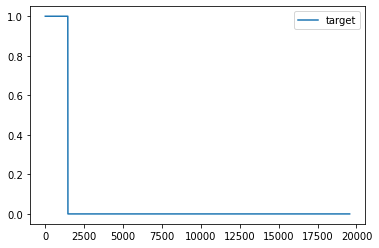

In [6]:
data.plot(y='target')
plt.show()

👇 How many observations of at-risk heartbeats are there? Save your answer as `at_risk_count`.

In [13]:
at_risk_count = len(data[data['target'] == 1])
at_risk_count

1448

👇 How many observations of healthy heartbeats are there? Save your answer as `healthy_count`.

In [15]:
healthy_count = len(data[data['target'] == 0])
healthy_count

18117

ℹ️ In certain cases, the class balance is representative of the true class distribution. This is the case here: the vast majority of people actually have healthy hearts. In such case, we preserve the class distribution inform the model on the reality, and adapt our modelling approach accordingly.

### ☑️ Check your code

In [16]:
from nbresult import ChallengeResult

result = ChallengeResult('class_balance',
                         healthy = healthy_count,
                         at_risk = at_risk_count
)

result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.6, pytest-6.2.3, py-1.10.0, pluggy-0.13.1 -- /Users/smrack/.pyenv/versions/3.8.6/envs/lewagon/bin/python3.8
cachedir: .pytest_cache
rootdir: /Users/smrack/code/olushO/data-challenges/05-ML/03-Performance-metrics/02-Electrocardiograms
plugins: anyio-2.2.0, dash-1.20.0
collecting ... collected 2 items

tests/test_class_balance.py::TestClass_balance::test_at_risk_count PASSED [ 50%]
tests/test_class_balance.py::TestClass_balance::test_healthy_count PASSED [100%]

============================== 2 passed in 0.02s ===============================


💯 You can commit your code:

git add tests/class_balance.pickle

git commit -m 'Completed class_balance step'

git push origin master


#  Logistic Regression

🎯 Your task is to flag heartbeats that are at risk of cardiovascular diseases.

👇 Let's start by investigating the performance of a `LogisticRegression` on that task. Use cross validation to evaluate the model on the following metrics:
- Accuracy
- Recall
- Precision
- F1

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

logr_model = LogisticRegression(max_iter=1000)

X = data.iloc[:,:-1].copy() # better use : df.drop(columns='target')
y = data.iloc[:,-1].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [45]:
from sklearn.model_selection import cross_validate

cv_results = cross_validate(logr_model, X_train, y_train, scoring= ['accuracy', 'recall','precision','f1'])
cv_results

{'fit_time': array([0.77686095, 0.79107618, 0.72765589, 0.80163097, 0.72347403]),
 'score_time': array([0.01108503, 0.01438904, 0.01006174, 0.01018286, 0.01220298]),
 'test_accuracy': array([0.93574297, 0.93537788, 0.93610807, 0.94085433, 0.94231471]),
 'test_recall': array([0.28571429, 0.32019704, 0.28921569, 0.37254902, 0.35294118]),
 'test_precision': array([0.65168539, 0.625     , 0.66292135, 0.69090909, 0.73469388]),
 'test_f1': array([0.39726027, 0.42345277, 0.40273038, 0.48407643, 0.47682119])}

In [52]:
for k, v in cv_results.items():
    print(f'{k} = {np.mean(v)}')

fit_time = 0.7641396045684814
score_time = 0.011584329605102538
test_accuracy = 0.9380795910916394
test_recall = 0.3241234424804405
test_precision = 0.6730419420066289
test_f1 = 0.43686820866057297


❓ What is the model's ratio of correct predictions? Save your answer under variable name `correct_pred_ratio`.

In [50]:
correct_pred_ratio = cv_results['test_accuracy'].mean()
correct_pred_ratio

0.9380795910916394

❓ What percentage of at-risk heartbeats is the model able to flag? Save your answer under variable name `flag_ratio`.

In [53]:
flag_ratio = cv_results['test_recall'].mean()
flag_ratio

0.3241234424804405

❓ When the model signals an at-risk heartbeat, how often is it correct? Save your answer under variable name `correct_detection_ratio`.

In [58]:
correct_detection_ratio = cv_results['test_precision'].mean()
correct_detection_ratio

0.6730419420066289

❓ What is the model's ability to flag as many at-risk heartbeats as possible while limiting false alarms?  Save your answer under variable name `aggregated_metric`.

In [56]:
aggregated_metric = cv_results['test_f1'].mean()
aggregated_metric

0.43686820866057297

ℹ️ By observing the different metrics, you should see that accuracy is deceiving. To understand what is going on, we can observe a breakdown of the model's predictions in a confusion matrix.

### ☑️ Check your code

In [59]:
from nbresult import ChallengeResult

result = ChallengeResult('logistic_regression_evaluation',
                         accuracy = correct_pred_ratio,
                         recall = flag_ratio,
                         precision = correct_detection_ratio,
                         f1 = aggregated_metric
)

result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.6, pytest-6.2.3, py-1.10.0, pluggy-0.13.1 -- /Users/smrack/.pyenv/versions/3.8.6/envs/lewagon/bin/python3.8
cachedir: .pytest_cache
rootdir: /Users/smrack/code/olushO/data-challenges/05-ML/03-Performance-metrics/02-Electrocardiograms
plugins: anyio-2.2.0, dash-1.20.0
collecting ... collected 4 items

tests/test_logistic_regression_evaluation.py::TestLogistic_regression_evaluation::test_accuracy PASSED [ 25%]
tests/test_logistic_regression_evaluation.py::TestLogistic_regression_evaluation::test_f1 PASSED [ 50%]
tests/test_logistic_regression_evaluation.py::TestLogistic_regression_evaluation::test_precision PASSED [ 75%]
tests/test_logistic_regression_evaluation.py::TestLogistic_regression_evaluation::test_recall PASSED [100%]

============================== 4 passed in 0.16s ===============================


💯 You can commit your code:

git add tests/logistic_regression_evaluat

# Confusion Matrix

👇 Using `plot_confusion_matrix` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html)),  visualize the predictions breakdown of the Logistic Regression model.

<details>
<summary>💡 Hints</summary>

- `plot_confusion_matrix` takes as input a **trained model** and **test data**
    
- You'll need to go back to the **Holdout method!** You can use Sklearn's `train_test_split()` ([doc](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html))
    
- Look into the `normalize` parameter
  
</details>



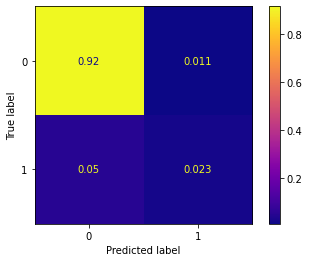

In [65]:
from sklearn.metrics import plot_confusion_matrix

logr_model.fit(X_train, y_train)

plot_confusion_matrix(logr_model, X_test, y_test,normalize='all', cmap='plasma')
plt.show()

ℹ️ The confusion matrix should show that the model is influenced by the class imbalance: it predicts heartbeats to be healthy most of the time. Due to this behaviour, the model is often correct and has a high accuracy. However, it causes it to miss out on many at risk heartbeats: it has a bad recall.

👉 This model is therefore poor at the task of **flagging at-risk observations**.

⚠️ Don't be fooled by the accuracy and look at the metric that corresponds to your task! ⚠️

# KNN Classifier

👇 Would a default KNN classifier perform better at the task of flagging at-risk observations?

Save the you answer under `best_model` as "KNN" or "LogisticRegression".

In [67]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()

cv_results_knn = cross_validate(knn_model, X_train, y_train, scoring= ['accuracy', 'recall','precision','f1'])
cv_results_knn

{'fit_time': array([0.01859021, 0.01615214, 0.01094222, 0.01088786, 0.01198697]),
 'score_time': array([1.29232383, 1.34743404, 1.25886369, 1.59765506, 1.21592593]),
 'test_accuracy': array([0.98284045, 0.98064987, 0.98101497, 0.98247536, 0.98320555]),
 'test_recall': array([0.84729064, 0.81773399, 0.82352941, 0.82352941, 0.83333333]),
 'test_precision': array([0.91489362, 0.91208791, 0.91304348, 0.93333333, 0.93406593]),
 'test_f1': array([0.8797954 , 0.86233766, 0.86597938, 0.875     , 0.88082902])}

In [68]:
cv_results_knn['test_recall'].mean()

0.8290833574809232

In [69]:
cv_results_knn['test_precision'].mean()

0.9214848549538651

In [70]:
cv_results_knn['test_accuracy'].mean()

0.9820372398685651

In [71]:
cv_results_knn['test_f1'].mean()

0.872788291148888

In [72]:
best_model ='KNN'

ℹ️ The KNN classifier should have a much higher recall than the LogisticRegression and therefore is better suited for the task.




### ☑️ Check your code

In [73]:
from nbresult import ChallengeResult

result = ChallengeResult('best_model',
                         model = best_model,
)
result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.6, pytest-6.2.3, py-1.10.0, pluggy-0.13.1 -- /Users/smrack/.pyenv/versions/3.8.6/envs/lewagon/bin/python3.8
cachedir: .pytest_cache
rootdir: /Users/smrack/code/olushO/data-challenges/05-ML/03-Performance-metrics/02-Electrocardiograms
plugins: anyio-2.2.0, dash-1.20.0
collecting ... collected 1 item

tests/test_best_model.py::TestBest_model::test_best_model PASSED         [100%]

============================== 1 passed in 0.03s ===============================


💯 You can commit your code:

git add tests/best_model.pickle

git commit -m 'Completed best_model step'

git push origin master


# Classification Report

Now that we know the KNN model has the best recall, let's check out its performance accross all the other classification metrics.

👇 Print out a `classification_report` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)) of the KNN model.

<details>
<summary> 💡 Hint  </summary>
    
You'll need to pass model predictions to `classification_report`. Sklearn's `cross_val_predict` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html)) might help 😉
</details>




In [74]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

In [76]:
y_pred = cross_val_predict(knn_model, X_train, y_train, cv=5)

target_names = ['class 0', 'class 1']
print(classification_report(y_train, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.99      0.99      0.99     12677
     class 1       0.92      0.83      0.87      1018

    accuracy                           0.98     13695
   macro avg       0.95      0.91      0.93     13695
weighted avg       0.98      0.98      0.98     13695



❓ Looking at the classification report, what is the model's ratio of correctly predicted at-risk heartbeats? Save your answer as a float under `correct_atrisk_predictions`

In [83]:
correct_atrisk_predictions = 0.92

### ☑️ Check your code

In [84]:
from nbresult import ChallengeResult

result = ChallengeResult('precision',
                         precision = correct_atrisk_predictions,
)

result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.6, pytest-6.2.3, py-1.10.0, pluggy-0.13.1 -- /Users/smrack/.pyenv/versions/3.8.6/envs/lewagon/bin/python3.8
cachedir: .pytest_cache
rootdir: /Users/smrack/code/olushO/data-challenges/05-ML/03-Performance-metrics/02-Electrocardiograms
plugins: anyio-2.2.0, dash-1.20.0
collecting ... collected 1 item

tests/test_precision.py::TestPrecision::test_precision PASSED            [100%]

============================== 1 passed in 0.04s ===============================


💯 You can commit your code:

git add tests/precision.pickle

git commit -m 'Completed precision step'

git push origin master


# Prediction

🎯 A patient comes to you for a second opinion on what he was told may be an at risk heartbeat.  Download its data [here](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Electrocardiograms_new_patient.csv).


❓ According to your optimal model, is he at risk or not?  

Save the prediction of your model under variable name `prediction` as "at risk" or "healthy".

In [88]:
patient_data = pd.read_csv('data/ML_Electrocardiograms_new_patient.csv')
patient_data

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,...,x_178,x_179,x_180,x_181,x_182,x_183,x_184,x_185,x_186,x_187
0,0.904762,0.993197,1.0,0.956916,0.902494,0.857143,0.802721,0.777778,0.709751,0.557823,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [94]:
knn_model.fit(X_train, y_train)
y_patient = knn_model.predict(patient_data)
y_patient

array([1])

In [96]:
prediction = 'at risk' if y_patient == 1 else "healthy"

### ☑️ Check your code

In [97]:
from nbresult import ChallengeResult

result = ChallengeResult('prediction',
                         prediction = prediction
)

result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.6, pytest-6.2.3, py-1.10.0, pluggy-0.13.1 -- /Users/smrack/.pyenv/versions/3.8.6/envs/lewagon/bin/python3.8
cachedir: .pytest_cache
rootdir: /Users/smrack/code/olushO/data-challenges/05-ML/03-Performance-metrics/02-Electrocardiograms
plugins: anyio-2.2.0, dash-1.20.0
collecting ... collected 1 item

tests/test_prediction.py::TestPrediction::test_prediction_at_risk PASSED [100%]

============================== 1 passed in 0.03s ===============================


💯 You can commit your code:

git add tests/prediction.pickle

git commit -m 'Completed prediction step'

git push origin master


# 🏁